In [25]:
from fastai.vision import *
import urllib.request

# View Data

In [72]:
root_data_dest = Path('data/')

In [73]:
np.random.seed(42)
data = ImageDataBunch.from_folder(root_data_dest, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4)
data = data.normalize(imagenet_stats)

In [75]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bill-gates',
  'elon-musk',
  'jack-ma',
  'jeff-bezos',
  'larry-ellison',
  'larry-page',
  'mark-zuckerberg'],
 7,
 790,
 197)

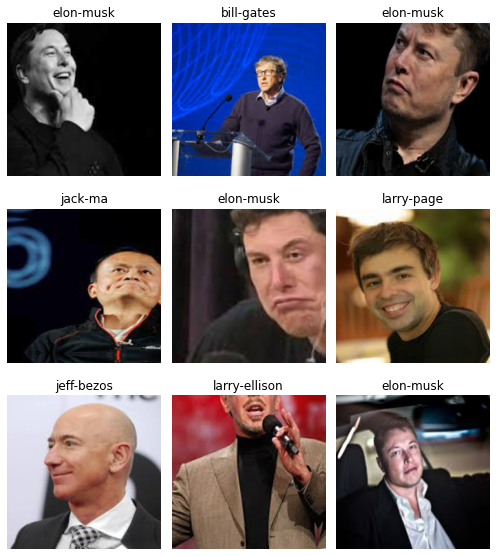

In [76]:
data.show_batch(rows=3, figsize=(7,8))

# Train data

In [79]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)


In [80]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.300360,1.493142,0.456853,00:06
1,1.605541,0.914839,0.228426,00:06
2,1.185133,0.560662,0.172589,00:06
3,0.931889,0.511035,0.147208,00:06


In [83]:
learn.model_dir = "../models/"
learn.save('technocrats-resnet50-v1')

# Results

In [84]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

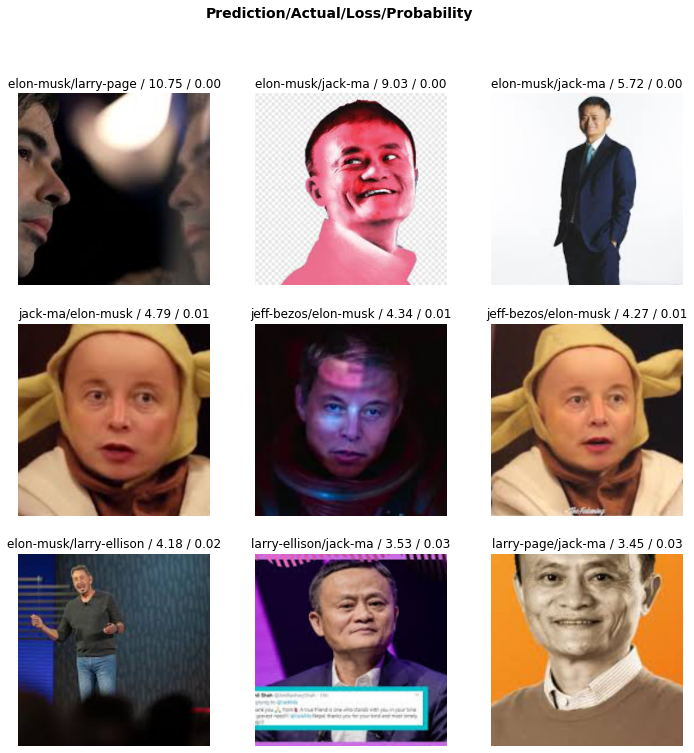

In [85]:
interp.plot_top_losses(9, figsize=(12,12))

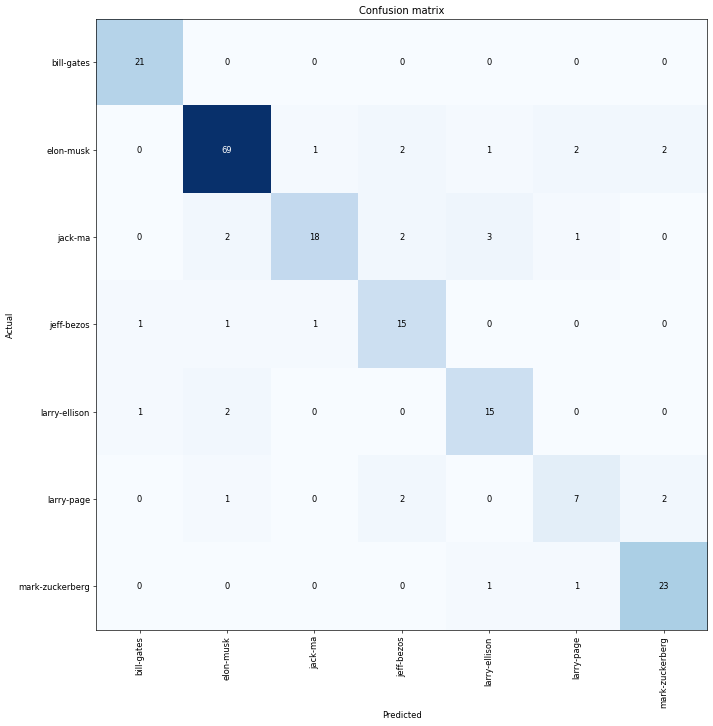

In [86]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# Fine-tuning

In [87]:
learn.unfreeze()

In [88]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.776027,1.898422,0.304569,00:08


In [89]:
learn.load('technocrats-resnet50-v1');

In [90]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


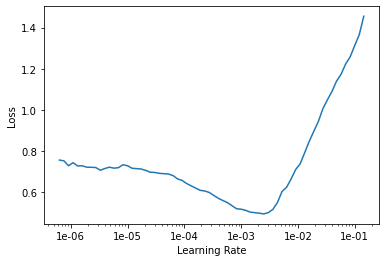

In [40]:
learn.recorder.plot()

In [41]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(10**(-3.5), 10**(-2.7)))

epoch,train_loss,valid_loss,error_rate,time
0,0.651563,0.495825,0.126904,00:04
1,0.478025,1.587064,0.319797,00:04
2,0.461865,2.727772,0.406091,00:05
3,0.462444,1.327824,0.279188,00:04
4,0.411617,0.700025,0.182741,00:04
5,0.355187,0.209222,0.060914,00:04
6,0.297844,0.216345,0.055838,00:04
7,0.241072,0.120147,0.030457,00:04
8,0.198703,0.108963,0.040609,00:04
9,0.173806,0.095553,0.020305,00:04


In [46]:
learn.model_dir = "../models/"
learn.save('technocrats-v2')

# Test it!

In [51]:
model_path = "./"

In [58]:
data2 = ImageDataBunch.single_from_classes(model_path, data.classes, size=224).normalize(imagenet_stats)

In [59]:
learn2 = cnn_learner(data2, models.resnet34)
learn2.load('technocrats-v2')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: .;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        

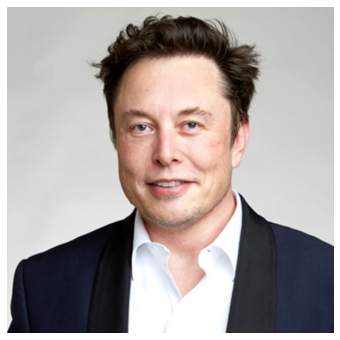

In [70]:
urllib.request.urlretrieve("https://www.biography.com/.image/t_share/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg", 
                           "test.jpg")
img = open_image("test.jpg")
img.show(figsize=(6,6))

In [71]:
pred_class, pred_idx, outputs = learn.predict(img)
data.classes[int(pred_class)]

'elon-musk'